In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os.path



In [2]:
# Get filepaths and labels

image_dir = Path("../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset")
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name = 'Filepath').astype(str)
labels = pd.Series(labels, name = 'Label')

In [3]:
# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis = 1)
image_df

,Filepath,Label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
...,...,...
17995,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
17996,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
17997,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
17998,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT


In [4]:
image_df.shape

(18000, 2)

In [5]:
image_df['Label'].value_counts()

Hourse Mackerel          1000
Hourse Mackerel GT       1000
Red Sea Bream            1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Shrimp                   1000
Shrimp GT                1000
Striped Red Mullet       1000
Striped Red Mullet GT    1000
Trout GT                 1000
Trout                    1000
Red Mullet GT            1000
Red Mullet               1000
Sea Bass GT              1000
Sea Bass                 1000
Black Sea Sprat          1000
Black Sea Sprat GT       1000
Red Sea Bream GT         1000
Name: Label, dtype: int64

In [7]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  18000 non-null  object
 1   Label     18000 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


In [5]:
# Drop GT images

image_df['Label'] = image_df['Label'].apply(lambda x: np.NaN if x[-2:] == 'GT' else x)
image_df = image_df.dropna(axis=0)

In [6]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  9000 non-null   object
 1   Label     9000 non-null   object
dtypes: object(2)
memory usage: 210.9+ KB


In [7]:
image_df['Label'].value_counts()

Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: Label, dtype: int64

# Let  try plot the 1 sample image from each category

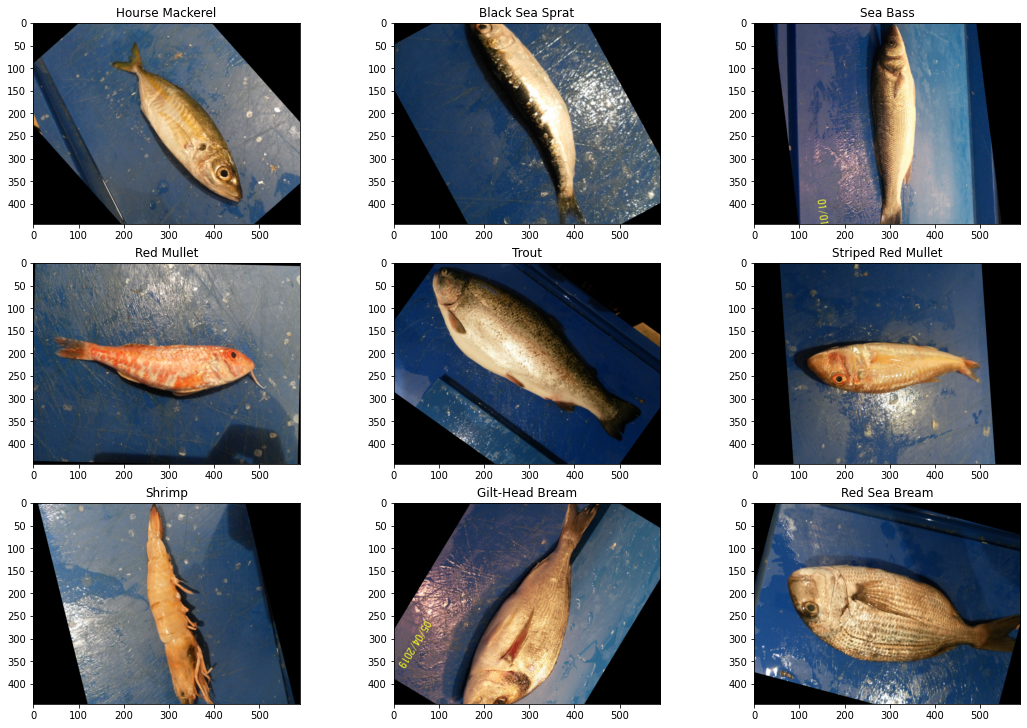

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), constrained_layout=True)
ax=ax.flatten()
j=0
for i in image_df['Label'].unique():
    
    ax[j].imshow(plt.imread(image_df[image_df['Label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(image_df, test_size=0.3,random_state=30)

In [10]:
print("Shape of training data", x_train.shape)
print("Shape of testing data", x_test.shape)

Shape of training data (6300, 2)
Shape of testing data (2700, 2)


# Creating the image dataset using Tensorflow

In [11]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import preprocess_input

In [12]:
# Train and test split with imagedatagenerator in keras
trainGen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    validation_split=0.3)


testGen =ImageDataGenerator(
    preprocessing_function= preprocess_input)

In [13]:
train_img = trainGen.flow_from_dataframe(
    dataframe=x_train, 
    x_col='Filepath', 
    y_col='Label', 
    target_size=(200,200), 
    color_mode='rgb', 
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

val_img = trainGen.flow_from_dataframe(
    dataframe=x_train, 
    x_col='Filepath', 
    y_col='Label', 
    target_size=(200,200), 
    color_mode='rgb', 
    class_mode='categorical',
    subset='validation',
    batch_size=32,
    shuffle=False
)

test_img = testGen.flow_from_dataframe(
    dataframe=x_test, 
    x_col='Filepath', 
    y_col='Label', 
    target_size=(200,200), 
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32,
    shuffle=False
)



Found 6300 validated image filenames belonging to 9 classes.
Found 1890 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.


# **Plotting image after preprocessing**

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


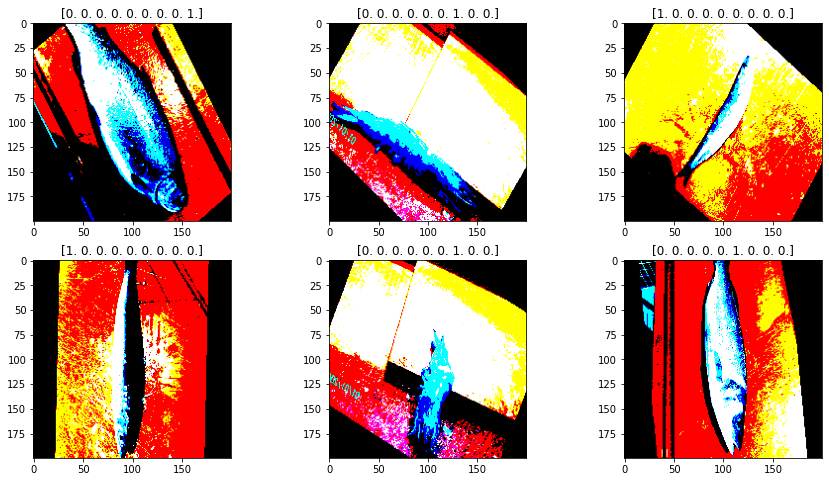

In [14]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_img.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [15]:
train_img[0][0].shape

(32, 200, 200, 3)

In [16]:
# here we define the model size

input_shape = (200, 200, 3)



In [17]:
train_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [18]:
val_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [19]:
test_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [20]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

# The CNN layer

In [21]:

model = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
           
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
           
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
           
    Dense(128, activation='relu'),
    Dropout(0.2),
           
    Dense(9, activation='sigmoid')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9

2023-02-04 14:06:26.984714: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
from tensorflow.keras.optimizers import Adam

In [23]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=["accuracy"]
)

In [24]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    patience=4, 
    mode = "min", 
    restore_best_weights=True
)

In [25]:
history = model.fit(
    train_img, 
    validation_data=val_img, 
    epochs=20, 
    callbacks=[
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )]
)

2023-02-04 14:06:27.713397: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
197/197 [==============================] - 289s 1s/step - loss: 2.2467 - accuracy: 0.2100 - val_loss: 1.6777 - val_accuracy: 0.3735
Epoch 2/20
197/197 [==============================] - 284s 1s/step - loss: 1.5014 - accuracy: 0.4479 - val_loss: 1.1148 - val_accuracy: 0.6053
Epoch 3/20
197/197 [==============================] - 284s 1s/step - loss: 1.0421 - accuracy: 0.6240 - val_loss: 0.7033 - val_accuracy: 0.7497
Epoch 4/20
197/197 [==============================] - 287s 1s/step - loss: 0.7811 - accuracy: 0.7225 - val_loss: 0.6024 - val_accuracy: 0.7878
Epoch 5/20
197/197 [==============================] - 287s 1s/step - loss: 0.5697 - accuracy: 0.7979 - val_loss: 0.3514 - val_accuracy: 0.8799
Epoch 6/20
197/197 [==============================] - 290s 1s/step - loss: 0.4322 - accuracy: 0.8487 - val_loss: 0.2853 - val_accuracy: 0.9074
Epoch 7/20
197/197 [==============================] - 295s 1s/step - loss: 0.3271 - accuracy: 0.8895 - val_loss: 0.2298 - val_accuracy: 0.9238

In [26]:
train_result = model.evaluate(train_img,verbose=0)

print("Train Accuracy:{:.2f}%".format(train_result[1]*100))

print("Train Loss:{:.5f}".format(train_result[0]))

Train Accuracy:98.92%
Train Loss:0.03906


In [27]:
val_result = model.evaluate(val_img,verbose=0)

print("Validation Accuracy:{:.2f}%".format(val_result[1]*100))

print("Validation Loss:{:.5f}".format(val_result[0]))

Validation Accuracy:98.94%
Validation Loss:0.03969


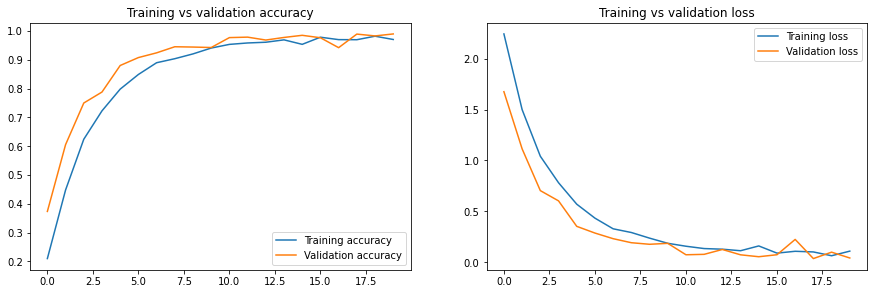

In [29]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

# Model Prediction

In [30]:
pred = model.predict(test_img)

In [31]:
pred=np.argmax(pred,axis=1)

In [34]:
pred_df=x_test.copy()
labels={}
for l,v in test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.8374074074074074


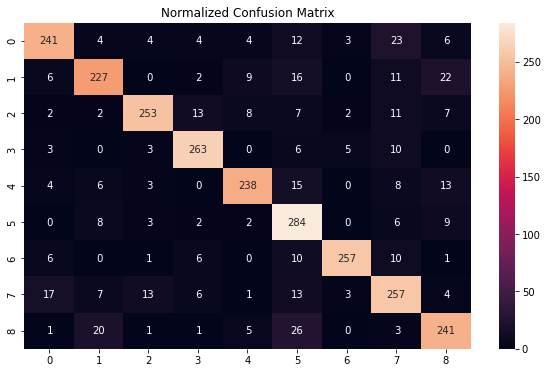

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
plt.figure(figsize = (10,6))
print(f"Accuracy Score: {accuracy_score(pred_df['Label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['Label'],pred_df['pred']), annot=True, fmt='2d')
plt.title('Normalized Confusion Matrix')
plt.show()

                                                Filepath               Label  \
8033   ../input/a-large-scale-fish-dataset/Fish_Datas...               Trout   
8685   ../input/a-large-scale-fish-dataset/Fish_Datas...               Trout   
42     ../input/a-large-scale-fish-dataset/Fish_Datas...     Hourse Mackerel   
4520   ../input/a-large-scale-fish-dataset/Fish_Datas...            Sea Bass   
11551  ../input/a-large-scale-fish-dataset/Fish_Datas...  Striped Red Mullet   
478    ../input/a-large-scale-fish-dataset/Fish_Datas...     Hourse Mackerel   

                     pred  
8033                Trout  
8685                Trout  
42        Hourse Mackerel  
4520             Sea Bass  
11551  Striped Red Mullet  
478       Hourse Mackerel  


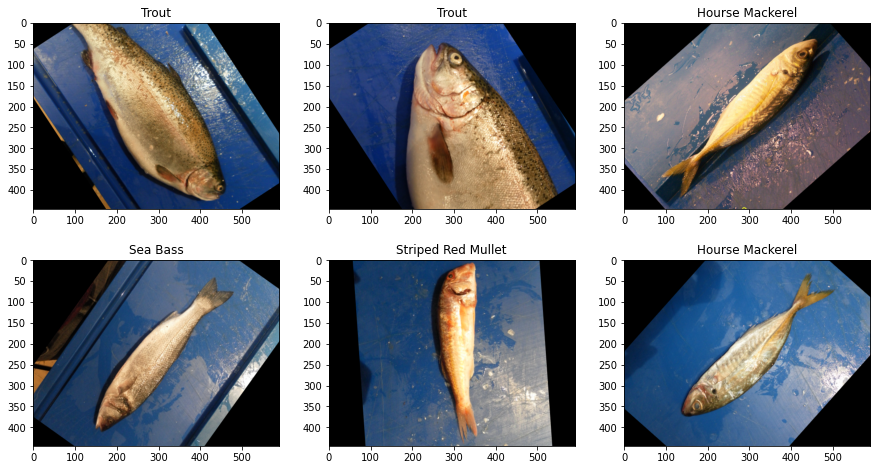

In [43]:
print(pred_df[pred_df['Label']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['Label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['Filepath'][i]))
    ax[i].set_title(imlist['Label'][i])

In [46]:
test_accuracy = model.evaluate(test_img)

print("Test Accuracy:{:.2f}%".format(test_accuracy[1]*100))

85/85 [==============================] - 41s 474ms/step - loss: 0.7809 - accuracy: 0.8396
Test Accuracy:83.96%
